In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


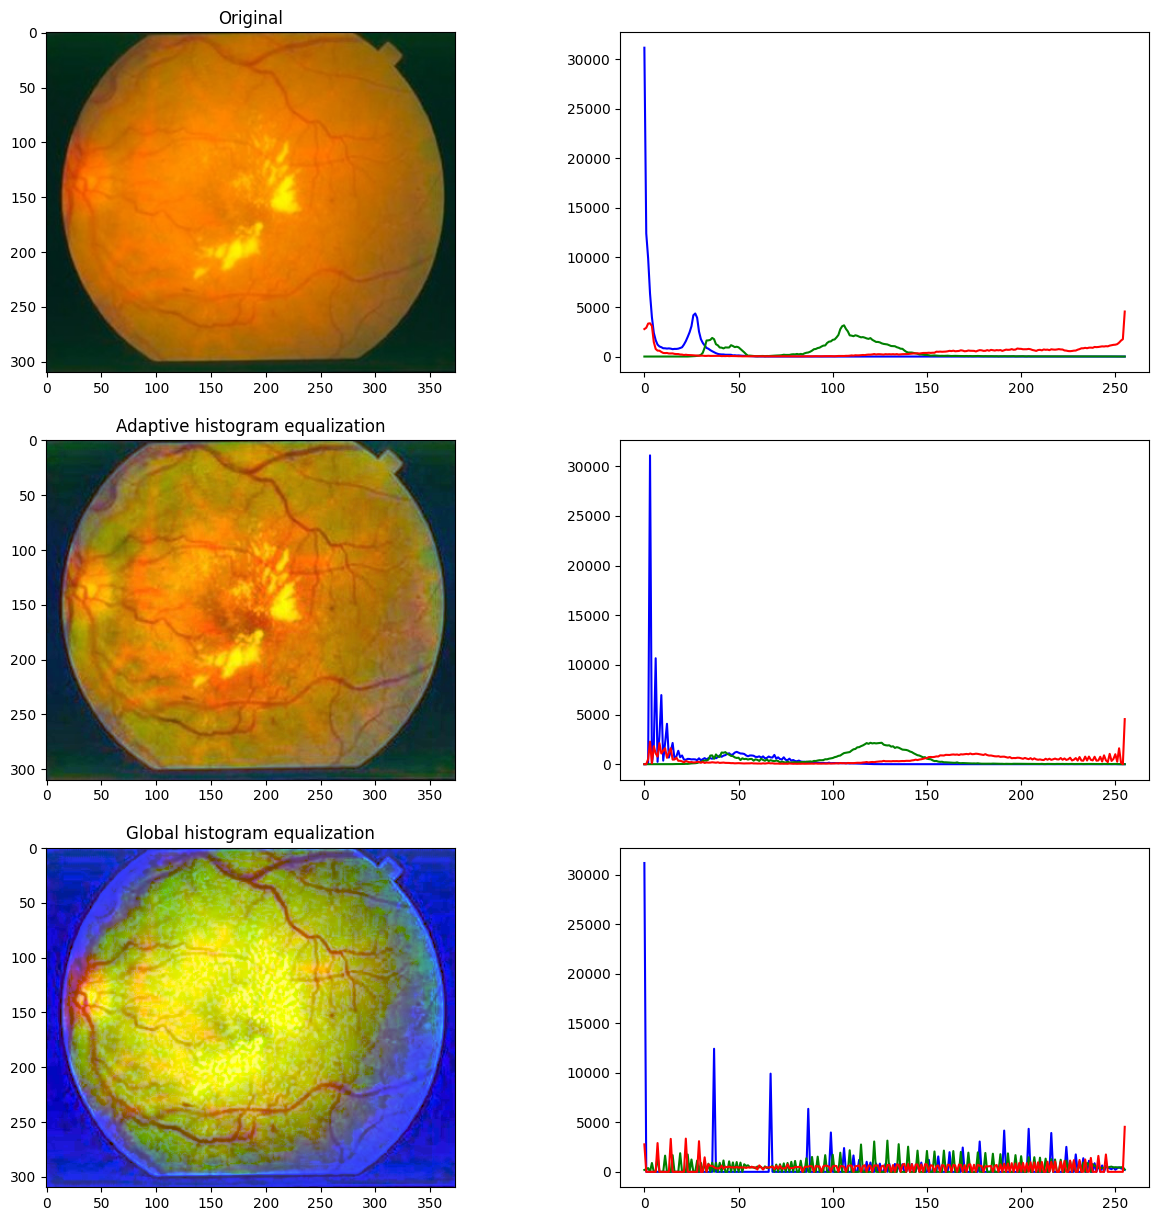

In [3]:
image = cv2.imread('media/images/retinal_fundus.jpg')
channels = cv2.split(image)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)


eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)


plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.title("Adaptive histogram equalization");
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.title("Global histogram equalization");


color = ('b', 'g', 'r')

plt.subplot(322);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

plt.subplot(324);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

plt.subplot(326);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

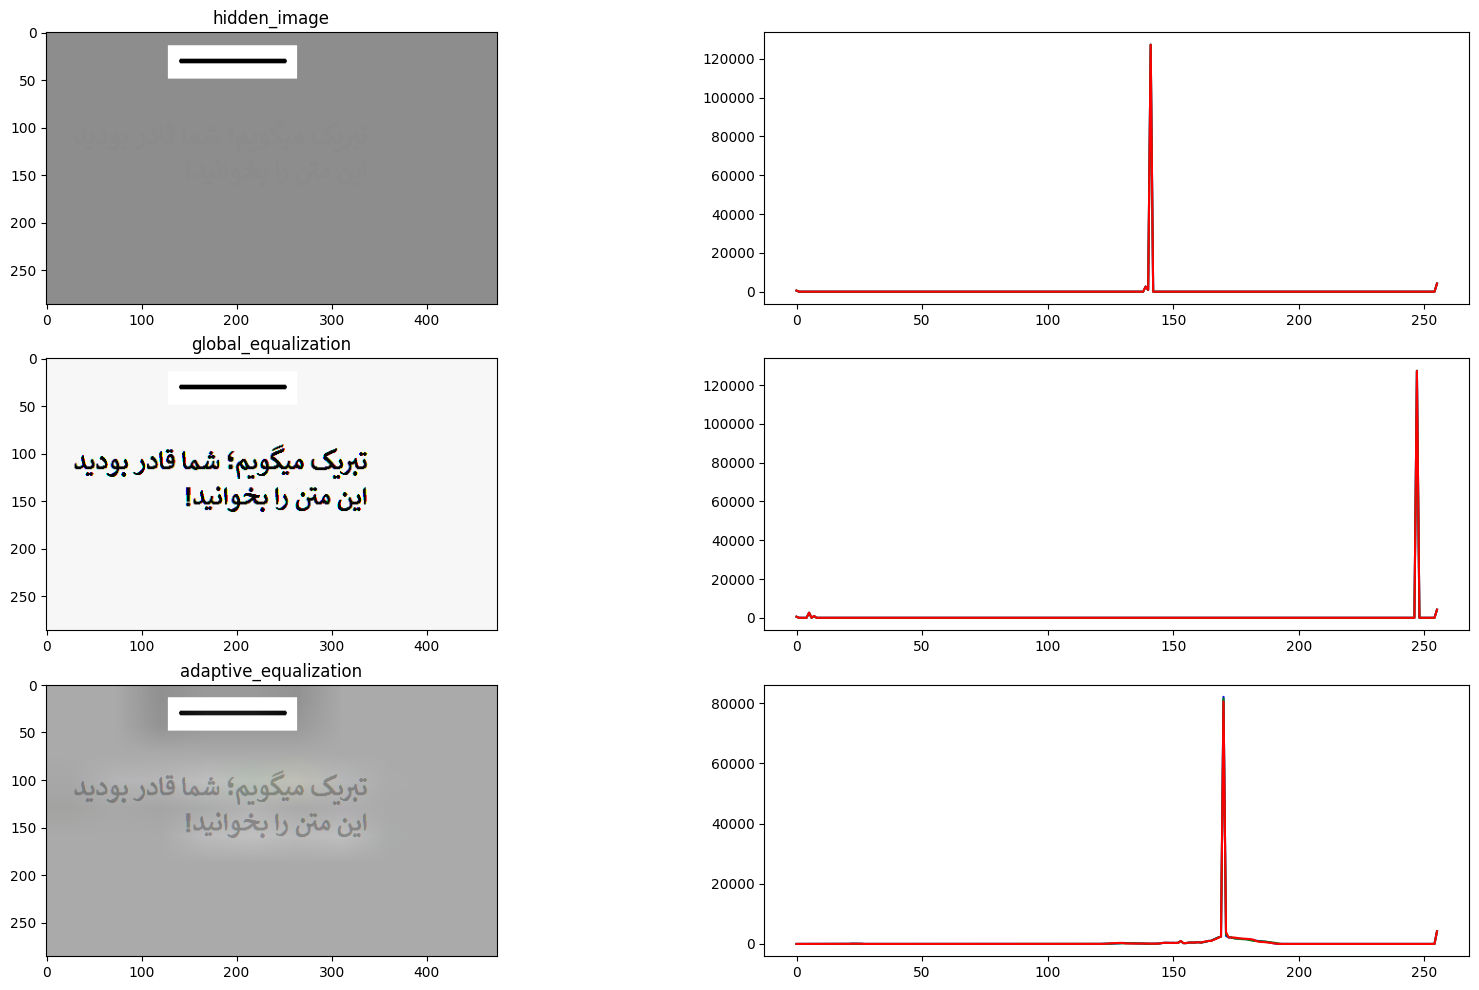

In [4]:
img = cv2.imread('media/images/hidden.png')


channel = cv2.split(img)
global_eq = []
adaptive_eq = []
color = ['b', 'g', 'r']
clahe = cv2.createCLAHE(clipLimit = 40, tileGridSize = (10,10))

for ch in channel:
    global_eq.append(cv2.equalizeHist(ch))
    adaptive_eq.append(clahe.apply(ch))

eq_g_img = cv2.merge(global_eq)
eq_adp_img = cv2.merge(adaptive_eq)

plt.figure(figsize=[20,12])
plt.subplot(321)
plt.imshow(img);plt.title('hidden_image')
plt.subplot(323)
plt.imshow(eq_g_img);plt.title('global_equalization')
plt.subplot(325)
plt.imshow(eq_adp_img);plt.title('adaptive_equalization')

plt.subplot(322)
for i ,c in enumerate(color):
    plt.plot(cv2.calcHist([img], [i], None, [256], [0,256]), color = c)

plt.subplot(324)
for i ,c in enumerate(color):
    plt.plot(cv2.calcHist([eq_g_img], [i], None, [256], [0,256]), color = c)    
    
plt.subplot(326)
for i ,c in enumerate(color):
    plt.plot(cv2.calcHist([eq_adp_img], [i], None, [256], [0,256]), color = c)